The bootstrap method is a statistical technique that allows us to predict quantities and confidence intervals given a sample. In particular we equally weight each of the points of our sample and then draw with replacement a new set of samples which we use to perform calculations. 

More formally, for a sample $S$ of size $n$, we create a distribution such that for $x \in S$ we have $$\mathbb{P}(x \in X)=\frac{1}{n}.$$

In this example we will generate some data from a known Poisson distribution with $\lambda=5$ and then use the bootstrap method to find a $99\%$ confidence interval around the mean.

For more information on this method see Wasserman's book 'All of Statistics'.

We start by generating our sample of size $10,000$.

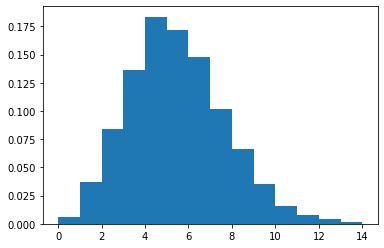

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 10000

data = np.random.poisson(5, n)
count, bins, ignored = plt.hist(data, 14, density=True)
plt.show()

We now draw $1000$ samples with replacement.

In [27]:
import random

redraw = 1000

samples = [ random.choices( data, k = 10000 ) for n in range( redraw )]

For example you can see the first redrawn sample here.

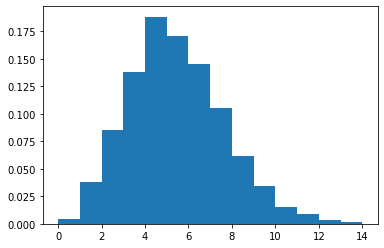

In [15]:
count, bins, ignored = plt.hist(samples[0], 14, density=True)
plt.show()

For each of these samples we can calculate the mean. (For those not familiar with a functional programming approach, the reduce function I am using in effect takes an operator and a sequence of values and applies that operator 'along' the list.)

In [28]:
import functools
import operator

def calculate_mean( sample ):
    sum = functools.reduce(operator.add, sample, 0)
    return sum/len(sample)

means = [ calculate_mean( sample ) for sample in samples ]

If we take look at a histogram of these means you can see the Central Limit Theorem at work, as they appear to be normally distributed, with a mean close to $5$.

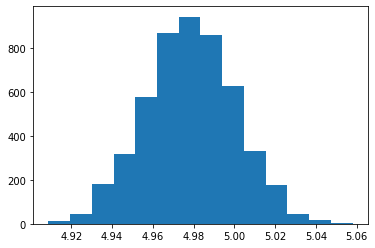

In [29]:
count, bins, ignored = plt.hist(means, 14)
plt.show()

To create a $99\%$ confidence interal, we need to shave off $0.5\%$ from either side of the distribution. Hence we order the values and discard the values outside of the middle $99\%$, then the highest and lowes values remaining for our $99\%$ confidence interval.

In [31]:
from math import ceil

means.sort()

amount_to_loose = ceil(0.05*n)
reduced_means = means[amount_to_loose : len(means)-amount_to_loose]
lower_bound = reduced_means[0]
upper_bound = reduced_means[len(reduced_means)-1]

Hence we can see we have a $99\%$ confidence interval lower bound of:

In [44]:
lower_bound 

4.9498

And an upper bound of:

In [46]:
upper_bound

5.0067

As a sanity check we can see this does in fact contain our original mean of $5$.